<h1>Introduction to Clustering Algorithms in Python</h1>

<h2>Import libraries</h2>

In [9]:
#pip install opencv-python

In [10]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io

<h2>Image resizing using OpenCV</h2>

In [11]:
image = cv2.imread('lion.jpg')
print('Original Dimensions : ',image.shape)
scale_percent = 22 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (900, 1600, 3)
Resized Dimensions :  (198, 352, 3)


<h2>Color Quantization with OpenCV</h2>

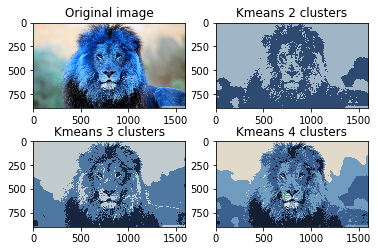

In [12]:
# import the image
image = cv2.imread('lion.jpg')

# the couple (h1, w1) defines the dimensions of the image: h1 for height and w1 for width
(h1, w1) = image.shape[:2]



# apply k-means using the specified number of clusters

########################################## 2 clusters ###############################################

# change the BGR color space to LAB color space
# BGR color is composed of three components: B - Blue (0-255), G - Green (0-255) and R - Red (0-255) 
# LAB color space has three components: L - Lightness (Intensity ), A - color component ranging from Green to Magenta and B - color component ranging from Blue to Yellow 
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# reshape the image to be a list of pixels
#image has the shape in the form of (h, w, c) which stands for h:height, w:width and c:channel 
# for example, an BGR image of size 256x256 has the shape of (256, 256, 3) and it contains 256*256*3 number of elements in total
# same amount of elements can be stored in a vector with shape (256*256*3, 1). This is what numpy.reshape does
# shape of the final array should have the same number of elements in it with the input array
image2 = image2.reshape((image2.shape[0] * image2.shape[1], 3))

# define number of clusters
clt2 = KMeans(n_clusters = 2)

# assign labels to the pixels 
labels2 = clt2.fit_predict(image2)
# create the quantized image based on the predictions
quant2 = clt2.cluster_centers_.astype("uint8")[labels2]

#reshape the feature vectors to images
quant2 = quant2.reshape((h1, w1, 3))
image2 = image2.reshape((h1, w1, 3))

# convert from LAB to RGB
quant2 = cv2.cvtColor(quant2, cv2.COLOR_LAB2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_LAB2BGR)

# save the new image
cv2.imwrite('lion(2).jpg', quant2)

########################################## 3 clusters ###############################################

image3 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image3 = image3.reshape((image3.shape[0] * image3.shape[1], 3))
clt3 = KMeans(n_clusters = 3)
labels3 = clt3.fit_predict(image3)
quant3 = clt3.cluster_centers_.astype("uint8")[labels3]
quant3 = quant3.reshape((h1, w1, 3))
image3 = image3.reshape((h1, w1, 3))
quant3 = cv2.cvtColor(quant3, cv2.COLOR_LAB2BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_LAB2BGR)
cv2.imwrite('lion(3).jpg', quant3)

########################################## 4 clusters ###############################################
image4 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image4 = image4.reshape((image4.shape[0] * image4.shape[1], 3))
clt3 = KMeans(n_clusters = 4)
labels4 = clt3.fit_predict(image4)
quant4 = clt3.cluster_centers_.astype("uint8")[labels4]
quant4 = quant4.reshape((h1, w1, 3))
image4 = image4.reshape((h1, w1, 3))
quant4 = cv2.cvtColor(quant4, cv2.COLOR_LAB2BGR)
image4 = cv2.cvtColor(image4, cv2.COLOR_LAB2BGR)
cv2.imwrite('lion(4).jpg', quant4)


# display images and wait for a keypress
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original image')
axs[0, 1].imshow(quant2)
axs[0, 1].set_title('Kmeans 2 clusters')
axs[1, 0].imshow(quant3)
axs[1, 0].set_title('Kmeans 3 clusters')
axs[1, 1].imshow(quant4)
axs[1, 1].set_title('Kmeans 4 clusters')
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>Explanation:</h3>
<p>First, we load our image off disk and grab its height and width, respectively.</p>

<p>The line <b>image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)</b> handles converting our image from the RGB color space to the LAB color space.

Why are we bothering doing this conversion?

Because in the LAB color space the euclidean distance between colors has actual perceptual meaning — this is not the case for the RGB color space.
Given that k-means clustering also assumes an euclidean space, we’re better off using LAB rather than RGB.</p>

<p>In order to cluster our pixel intensities, we need to reshape our image using <b>image.reshape(M, N, X)</b> method.
This line of code simply takes a (M, N, 3) image, (M x N pixels, with X=3 components per pixel) and reshapes it into a (M x N, 3) feature vector. 
This reshaping is important since k-means assumes a two dimensional array, rather than a three dimensional image.</p>

<p>From there, we can apply our actual mini-batch K-Means clustering using the number of clusters we specified (n_clusters = 2).
Besides the actual clustering, the line <b>labels = clt.fit_predict(image)</b> handles something extremely important: predicting what quantized color each pixel in the original image is going to be. 
This prediction is handled by determining which centroid the input pixel is closest to.</p>

<p>Then, we can take these predicted labels and create our quantized image using some NumPy indexing. 
<b>quant = clt.cluster_centers_.astype("uint8")[labels]</b> : all this line is doing is using the predicted labels to lookup the LAB color in the centroids array.</p>

<p>Now we have to reshape our (M x N, 3) feature vector back into a (M, N, 3) dimensional image and by convert our images from the LAB color space back to RGB.</p>

<p>Finally, all we need is to display our original and quantized image and take a look at the results.</p>

<h2>Adding random noise to an image</h2>

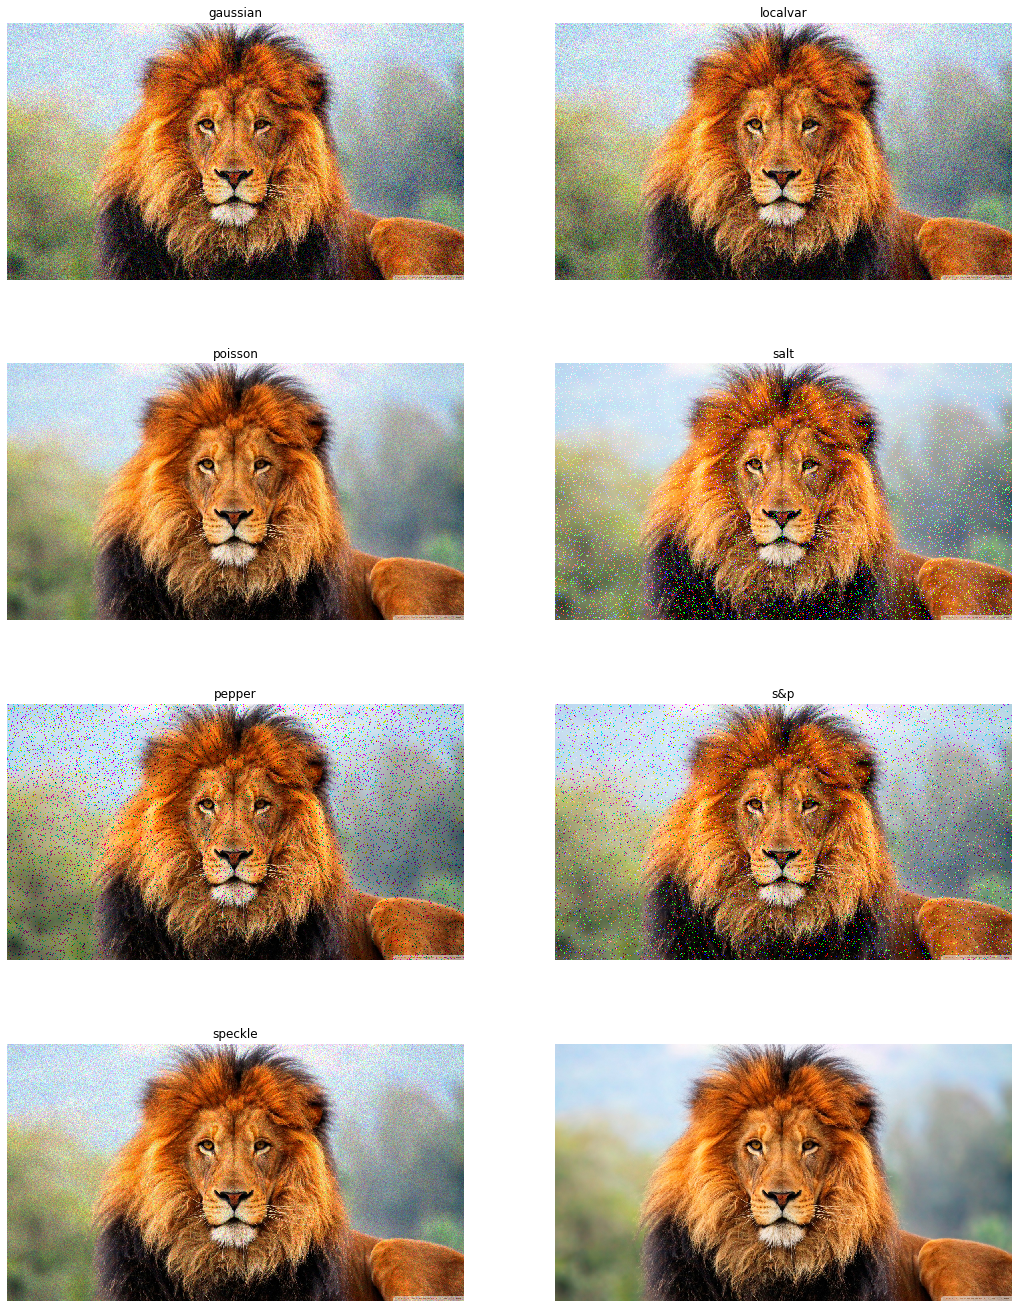

In [13]:
# define image path
img_path="lion.jpg"

# import the image
img = skimage.io.imread(img_path)/255.0

# create a function to add gaussian, localvar, poisson, salt, pepper, salt-pepper and speckle noise to the image
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


<h3>=> Use of interactive mode :</h3>

In [39]:
import skimage.io
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="lion.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    img_path="lion.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt","Pepper","Speckle"]);
plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'Pepper…

<h2>Adding a specific type of noise to an image then denoising it</h2>

<h3>I) Add pepper noise to the image</h3>

<h3>II) Denoising image</h3>

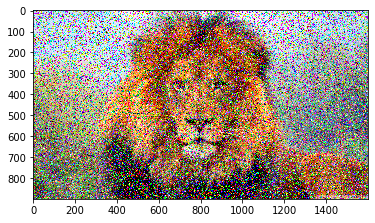

In [31]:
from skimage.util import random_noise

# define image path
img_path="lion.jpg"

# import the image
img = skimage.io.imread(img_path)/255.0
# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.imshow(noise_img)

# Display the noise image
#cv2.imshow('blur',noise_img)
#cv2.waitKey(0)

True

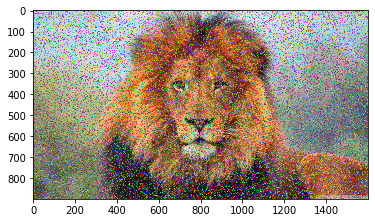

In [32]:
from skimage.restoration import denoise_tv_chambolle
denoised_image = denoise_tv_chambolle(noise_img, weight=0.1, multichannel=True)
# save and show denoised image
plt.imshow(denoised_image)
cv2.imwrite('lion-denoised.jpg', denoised_image)

In [33]:
pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         0.24.0   
astroid                            2.2.5    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.1.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.7.1    
bitarray                           0.9.3    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

In [34]:
conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.
